<a href="https://colab.research.google.com/github/gabipalacios/Python/blob/main/TFPython2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Metadatos

El dataset analizado contiene 15.157 registros y seis columnas que se detallan:

**id**: número entero secuencial que indentifica de forma única un registro comenzando en 1.

**edad**: corresponde a la edad expresada en años. Tipo de dato: numérico entero. Valores que toma: entre 15 y 19.

**anios_educ**: años de educación recibida. Tipo de dato: numérico entero. Valores que toma: entre 6 y 12.

**en_pareja**: indica si la persona está en pareja o no. Tipo de dato: numérico entero. Valores que toma: 0 (No) 1 (Sí).????? Chequear

**num_hijos**: corresponde al número de hijos del adolescente. Tipo de dato: numérico entero. Valores que toma: entre 0 y 3.

**bajo_socioecon**: indica si el nivel socioeconómico es bajo o no. Tipo de dato: numérico entero. Valores que toma 0 (No) 1 (Sí). ?????? Chequear


## QUE ES EL DATASET?

In [351]:
#Importación de librerías básicas y de visualizacion

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns

In [352]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [353]:
#Importa el dataset inicial, solicitando se considere el id propio.
df = pd.read_excel(
    '/content/drive/MyDrive/Academia/Python/Intro2025python/TFINAL/Educacion_Sexual.xlsx')#,index_col="id")


##Análisis de estrtructura del Dataset:

In [354]:
#Volumen del dataset:
df.shape

(15157, 6)

In [355]:
df.sample(5)

,id,edad,anios_educ,en_pareja,num_hijos,bajo_socioecon
12376,12377,18,8,0,0,0
5506,5507,15,8,0,0,0
13852,13853,19,9,0,0,0
8629,8630,19,9,0,0,1
6383,6384,16,7,0,0,0


In [356]:
#Revisar si tiene valores faltantes, para corregir o dropear si corresponde.
df.isnull().sum()

,0
id,0
edad,0
anios_educ,0
en_pareja,0
num_hijos,0
bajo_socioecon,0


In [357]:
# prompt: revisar si hay registros duplicados

#Revisar si hay registros duplicados:
df.duplicated().sum()

np.int64(0)

In [358]:
# Verificamos si no hay registros repetidos

# Cuenta la frecuencia de cada 'id'
id_counts = df['id'].value_counts()

# Filtra los 'id' que se repiten (frecuencia > 1)
repeated_ids = id_counts[id_counts > 1]

# Imprime los 'id' repetidos y sus conteos
print("Valores repetidos en el campo 'id':")
print(repeated_ids)

# También puedes imprimir la cantidad total de IDs repetidos
print(f"\nTotal de IDs repetidos: {len(repeated_ids)}")

Valores repetidos en el campo 'id':
Series([], Name: count, dtype: int64)

Total de IDs repetidos: 0


In [359]:
#Tipos de datos:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              15157 non-null  int64
 1   edad            15157 non-null  int64
 2   anios_educ      15157 non-null  int64
 3   en_pareja       15157 non-null  int64
 4   num_hijos       15157 non-null  int64
 5   bajo_socioecon  15157 non-null  int64
dtypes: int64(6)
memory usage: 710.6 KB


In [360]:
#Extraer una parte del dataset para conocer la estructura
df.head()#sample()

,id,edad,anios_educ,en_pareja,num_hijos,bajo_socioecon
0,1,18,9,0,0,1
1,2,16,7,0,0,1
2,3,15,9,0,0,1
3,4,17,9,1,0,0
4,5,18,9,1,0,0


In [361]:
#Análisis descriptivo de las variables numéricas
df.describe()

,id,edad,anios_educ,en_pareja,num_hijos,bajo_socioecon
count,15157.00000,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,7579.00000,16.962064,8.506763,0.161707,0.150887,0.250049
std,4375.59335,1.413214,1.176005,0.368194,0.409855,0.433056
min,1.00000,15.000000,6.000000,0.000000,0.000000,0.000000
25%,3790.00000,16.000000,8.000000,0.000000,0.000000,0.000000
50%,7579.00000,17.000000,9.000000,0.000000,0.000000,0.000000
75%,11368.00000,18.000000,9.000000,0.000000,0.000000,1.000000
max,15157.00000,19.000000,12.000000,1.000000,3.000000,1.000000


##Revisión inicial
Se observa que es un dataset que no requiere mayor mantenimiento.
Contiene 5 variables a anlizar, con datos completos y en formato numérico.
En la descripción y cuartiles no parece tener anomalías que afecten el análisis.

In [362]:
#Distribución por categoría de:
df.value_counts('edad')

,count
edad,
15,3135
16,3119
17,2998
18,2996
19,2909


In [363]:
#Distribución por categoría de:
df.value_counts('anios_educ')

,count
anios_educ,
9,7658
7,3394
8,3105
12,778
11,93
10,71
6,58


In [364]:
#Distribución por categoría de:
df.value_counts('num_hijos')

,count
num_hijos,
0,13153
1,1740
2,245
3,19


In [365]:
#Distribución por categoría de:
df.value_counts('bajo_socioecon')

,count
bajo_socioecon,
0,11367
1,3790


In [366]:
#Distribución por categoría de:
df.value_counts('en_pareja')

,count
en_pareja,
0,12706
1,2451


In [367]:
#Se muestran las columnas para facilitar la selección y graficar, boxplot
df.columns

Index(['id', 'edad', 'anios_educ', 'en_pareja', 'num_hijos', 'bajo_socioecon'], dtype='object')

##Se analizan de forma gráfica las 3 variables no binarias

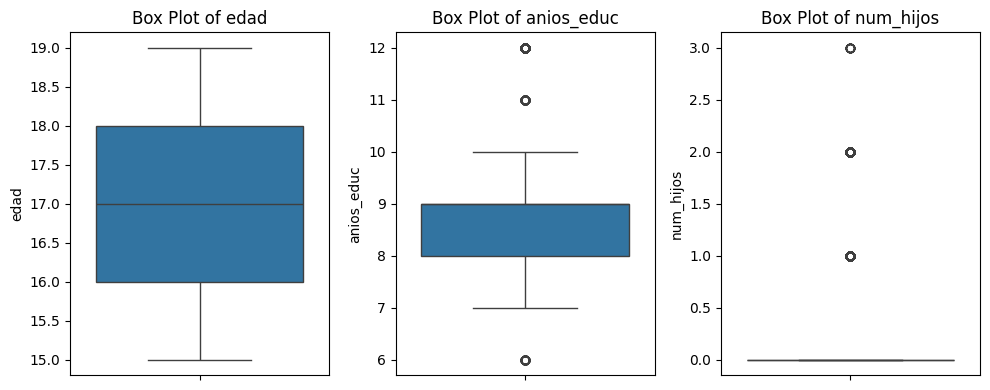

In [368]:
#Tomo las variables que no son binarias y analizo quantiles y outliers:

variables = ['edad', 'anios_educ','num_hijos']

fig, axes = plt.subplots(1, 3, figsize=(10, 4))

for i, var in enumerate(variables):
    sns.boxplot(y=df[var], ax=axes[i])
    axes[i].set_title(f'Box Plot of {var}')

plt.tight_layout()
plt.show()

- Edad: No presenta outliers, parece una distribución equitativa entre las edades.
- Educ: Se conentran los datos entre 8 y 9 años, luce como una distribución normal, dato que que vamos a corroborar en histograma, tiene outliers (datos que se encuentra fuera de los limites del rango intercuartilico).
- Hijos, se observa una concentración en 0, y de manera aislada los otros rangos, dada su distribución se puede esperar alguna modificación de la variable para obtener mejores conclusiones.

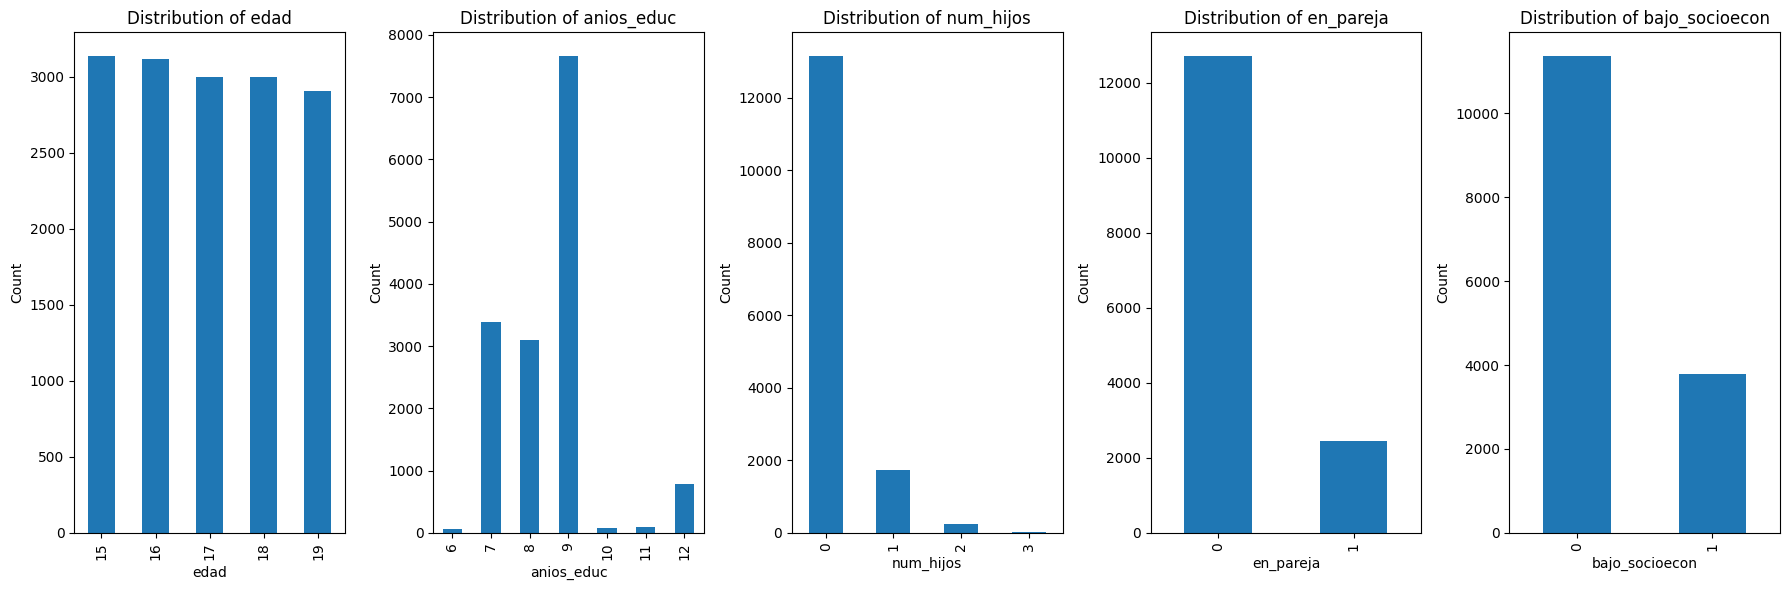

In [369]:
variables = ['edad', 'anios_educ','num_hijos','en_pareja','bajo_socioecon']

fig, axes = plt.subplots(1, 5, figsize=(18, 6))

# Iterate through the variables and create the bar plots
for i, var in enumerate(variables):
  # Since axes is 1-dimensional, access it using a single index:
  ax = axes[i]
  df.groupby(var).size().plot.bar(ax=ax)
  ax.set_title(f'Distribution of {var}')
  ax.set_xlabel(var)
  ax.set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

Confirmamos las sospechas en cuanto a la distribución de las variables.
Realizaremos modificación en 'num_hijos' para obtener mejores conclusiones.

In [370]:
#Analizamos la correlación de todas las variables.
corr_df = df[['edad', 'anios_educ','num_hijos','en_pareja','bajo_socioecon']].corr()
corr_df

,edad,anios_educ,num_hijos,en_pareja,bajo_socioecon
edad,1.000000,0.040193,0.270632,0.245869,0.020460
anios_educ,0.040193,1.000000,0.153597,0.154045,-0.000989
num_hijos,0.270632,0.153597,1.000000,0.601265,0.019753
en_pareja,0.245869,0.154045,0.601265,1.000000,0.013295
bajo_socioecon,0.020460,-0.000989,0.019753,0.013295,1.000000


##Resultado correlación
No se observan correlaciones marcadas, las más correlacionadas tienen que ver con la edad y num_hijos o en_pareja.

<Axes: >

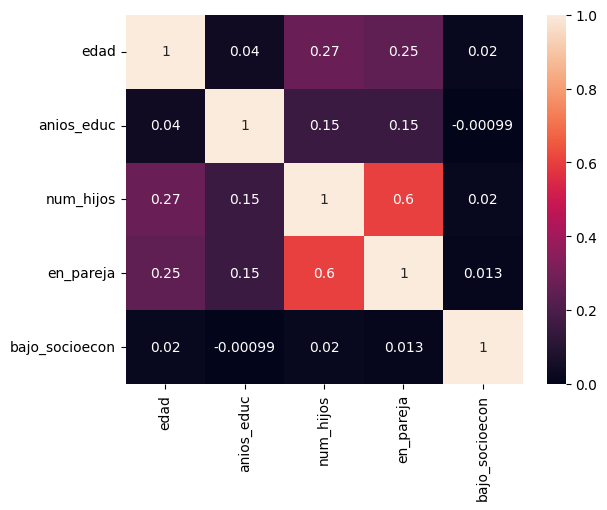

In [371]:
#Gráficamente correlación
sns.heatmap(corr_df, annot=True)

##Transformación del campo ['num_hijos']
Analizamos detalle del campo ['num_hijos'], vemos que dentro de la muestra hay pocos datos con valores de 2 y 3, por lo que creemos conveniente reagrupar.

In [372]:
#Creamos un nuevo DataFrame para mostrar cuantos registros tienen cada 'valor' de hijos.
num_hijos_counts = df.groupby('num_hijos').size().reset_index(name='cantidad')
#Calculo el valor total por segmento
total_count = num_hijos_counts['cantidad'].sum()
#Creo el campo de '%' especifico para este dataframe
num_hijos_counts['%'] = (num_hijos_counts['cantidad'] / total_count) * 100
num_hijos_counts

,num_hijos,cantidad,%
0,0,13153,86.778386
1,1,1740,11.479844
2,2,245,1.616415
3,3,19,0.125355


In [373]:
#Utilizamos el método .apply() sobre el campo ['num_hijos'], que transforma los valores según
# la condición a cada columna, complementando con la función 'lambda' que define la función condicional.
df['num_hijos_bin'] = df['num_hijos'].apply(lambda x: 1 if x > 0 else 0)
df.head()

,id,edad,anios_educ,en_pareja,num_hijos,bajo_socioecon,num_hijos_bin
0,1,18,9,0,0,1,0
1,2,16,7,0,0,1,0
2,3,15,9,0,0,1,0
3,4,17,9,1,0,0,0
4,5,18,9,1,0,0,0


##Observaciones del campo ['IndiceEduc']
Consideramos que la variable puede estar sesgada en relación a la edad, dado que por ejemplo, no sería comprable 8 años de estudio para una persona de 15 años que con otra de 19 años.

In [374]:
# prompt: desccribe para 1 sola variable

df['anios_educ'].describe()

,anios_educ
count,15157.000000
mean,8.506763
std,1.176005
min,6.000000
25%,8.000000
50%,9.000000
75%,9.000000
max,12.000000


Vemos que los años de estudio van desde los 6 a los 12 años.
En Uruguay la escolarización obligatoria inicial en Nivel inicial 3.
En este sentido hacemos un supuesto que, para este grupo de personas, 12 años de estudio implica haber terminado el ciclo básico (3ro de liceo).
Este supuesto puede tener sentido dado que estaría dentro de la media que el 50% de la muestra haya terminado l escuela.

#Creamos nueva variable
Para determinar, cual es el máximo posible de años escolarizados de acuerdo a la edad.

In [375]:
df['Educ_Ideal'] = df['edad'] - 3

Creamos un Indice de escolarización, con los años de educación / años de educación ideal

In [376]:
df['%EduIdeal'] = df['anios_educ']/df['Educ_Ideal']

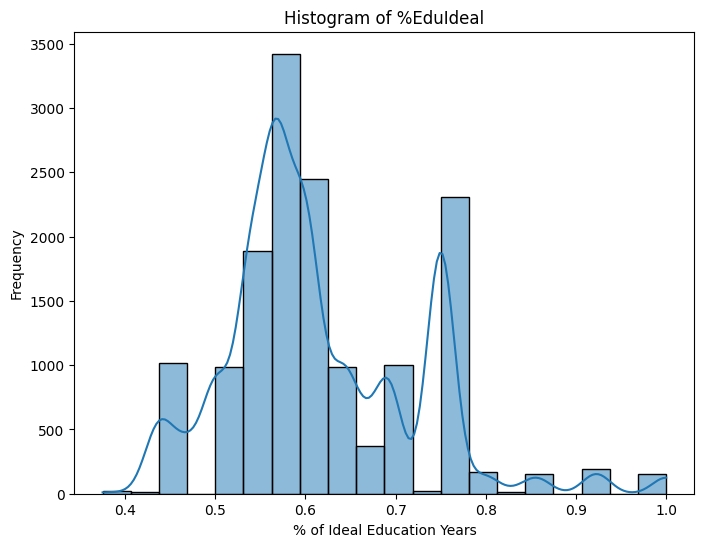

In [377]:
#Analizamos el resultado de la nueva variable
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='%EduIdeal', bins=20, kde=True)
plt.title('Histogram of %EduIdeal')
plt.xlabel('% of Ideal Education Years')
plt.ylabel('Frequency')
plt.show()

In [378]:
#Creamos un subset para indagar e interpretar el resultado
registros_con_valor= df[df['%EduIdeal'] == 1]
registros_con_valor

,id,edad,anios_educ,en_pareja,num_hijos,bajo_socioecon,num_hijos_bin,Educ_Ideal,%EduIdeal
220,221,15,12,0,0,0,0,12,1.0
229,230,15,12,0,0,0,0,12,1.0
705,706,15,12,0,1,1,1,12,1.0
760,761,15,12,0,0,1,0,12,1.0
928,929,15,12,0,0,0,0,12,1.0
...,...,...,...,...,...,...,...,...,...
14539,14540,15,12,0,0,0,0,12,1.0
14609,14610,15,12,0,0,1,0,12,1.0
14805,14806,15,12,0,0,0,0,12,1.0
15022,15023,15,12,0,0,1,0,12,1.0


In [379]:
registros_con_valor.value_counts('edad')

,count
edad,
15,154


EL resultado muestra un valor máximo en el cuál, las personas más escolarizadas son las que tienen 15 años y 12 de estudio, dado que no perdieron nungún año hasta el momento y completaron todos los niveles educativos.

#Categorizamos la variable ['anios_educ'], creemos que tendremos mejores resultados:

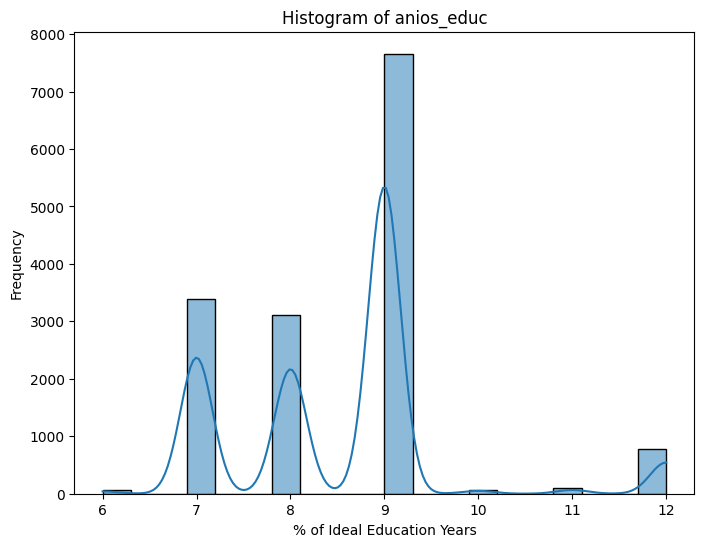

In [380]:
#Analizamos el resultado de la nueva variable
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='anios_educ', bins=20, kde=True)
plt.title('Histogram of anios_educ')
plt.xlabel('% of Ideal Education Years')
plt.ylabel('Frequency')
plt.show()

En función a la distribución actual, parece razonable segmentar hasta 8, 9 y a partir de 10. Con valor numérico representando el nivel educativo del 1 al 3

In [381]:
df['anios_educ_cat'] = df['anios_educ'].apply(lambda x: 1 if x >= 0 and x <= 8
                                              else (2 if x == 9
                                                    else (3 if x >= 10 and x <= 12
                                                          else '')))
df['anios_educ_cat'].value_counts()

,count
anios_educ_cat,
2,7658
1,6557
3,942


In [382]:
df.sample(10)

,id,edad,anios_educ,en_pareja,num_hijos,bajo_socioecon,num_hijos_bin,Educ_Ideal,%EduIdeal,anios_educ_cat
11534,11535,18,8,0,0,1,0,15,0.533333,1
9647,9648,19,9,0,0,0,0,16,0.562500,2
12832,12833,18,8,0,0,0,0,15,0.533333,1
7505,7506,18,9,0,0,0,0,15,0.600000,2
172,173,19,8,0,0,1,0,16,0.500000,1
10582,10583,16,9,0,0,0,0,13,0.692308,2
11935,11936,15,9,0,0,0,0,12,0.750000,2
12729,12730,19,7,0,0,1,0,16,0.437500,1
12184,12185,18,9,0,0,0,0,15,0.600000,2
10151,10152,16,7,0,0,0,0,13,0.538462,1


In [383]:
df.sample(5)

,id,edad,anios_educ,en_pareja,num_hijos,bajo_socioecon,num_hijos_bin,Educ_Ideal,%EduIdeal,anios_educ_cat
7988,7989,16,7,0,0,0,0,13,0.538462,1
14914,14915,17,8,0,0,0,0,14,0.571429,1
12051,12052,16,9,0,0,1,0,13,0.692308,2
14288,14289,18,6,1,1,0,1,15,0.400000,1
4989,4990,17,9,0,0,1,0,14,0.642857,2


In [384]:
pd.value_counts(df['%EduIdeal'])

<ipython-input-384-9f37331bf13b>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['%EduIdeal'])


,count
%EduIdeal,
0.750000,2290
0.600000,1963
0.562500,1618
0.538462,1432
0.571429,1347
0.500000,982
0.642857,979
0.692308,973
0.437500,622


In [385]:
df['%EduIdeal'].describe()

,%EduIdeal
count,15157.000000
mean,0.615353
std,0.105376
min,0.375000
25%,0.538462
50%,0.600000
75%,0.692308
max,1.000000


In [386]:
df['%EduIdeal_binned'] = pd.qcut(df['%EduIdeal'], q=4 , labels=['Bajo','MedioBajo','MedioAlto','Alto'], duplicates='drop')
df.sample(5)

,id,edad,anios_educ,en_pareja,num_hijos,bajo_socioecon,num_hijos_bin,Educ_Ideal,%EduIdeal,anios_educ_cat,%EduIdeal_binned
8067,8068,19,12,0,1,0,1,16,0.750000,3,Alto
7279,7280,16,7,0,0,0,0,13,0.538462,1,Bajo
6522,6523,15,12,0,0,1,0,12,1.000000,3,Alto
5432,5433,17,9,1,1,0,1,14,0.642857,2,MedioAlto
13250,13251,16,8,0,0,0,0,13,0.615385,1,MedioAlto


In [387]:
# En función al resultado de la transformación de la variable %EduIdeal, creemos conveniente discretizar la mimsma en 10 bines,
# dónde resutla una variable de menos a más, en la cual el 1 representa el máximo nivel aducativo de acuerdo a la edad de la persona.
#df['%EduIdeal_binned'] = pd.qcut(df['%EduIdeal'], q=5, labels=False, duplicates='drop')
#df.sample(5)

In [388]:
df.value_counts('%EduIdeal_binned')

,count
%EduIdeal_binned,
MedioBajo,5385
Bajo,3913
Alto,3022
MedioAlto,2837


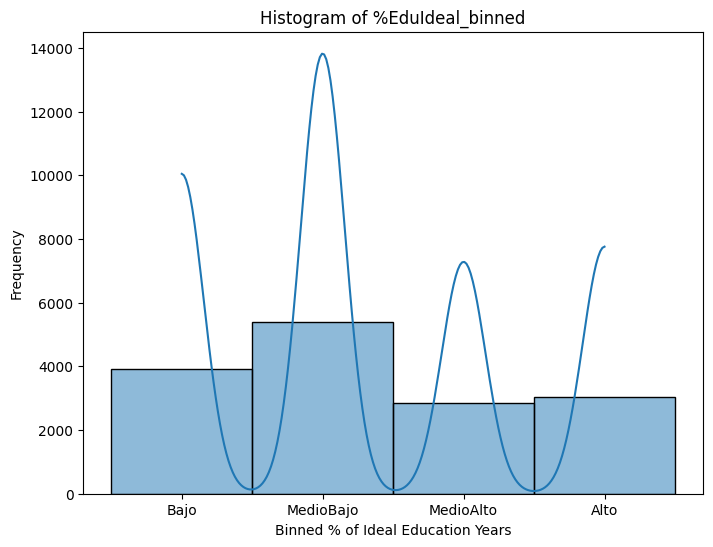

In [389]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='%EduIdeal_binned', bins=10, kde=True)
plt.title('Histogram of %EduIdeal_binned')
plt.xlabel('Binned % of Ideal Education Years')
plt.ylabel('Frequency')
plt.show()


In [390]:
# Como ya categorizamos o transformamos las siguiente variables de acuerdo a la obtención de información, quietamos las originales.
df = df.drop(['anios_educ', 'num_hijos','%EduIdeal'], axis=1)

In [391]:
df.shape

(15157, 8)

In [392]:
#Borramos la variables 'id' proveniente del dataset, y 'Educ_Ideal' (discretizasa)

df = df.drop(['id', 'Educ_Ideal','anios_educ_cat'], axis=1)
df.sample(5)

,edad,en_pareja,bajo_socioecon,num_hijos_bin,%EduIdeal_binned
9306,16,0,0,0,Bajo
11093,19,0,0,0,MedioBajo
10473,18,0,0,0,Alto
11553,15,0,1,0,Alto
14040,15,0,0,0,Alto


In [393]:
#Crear otro campo con los valores de '%EduIdeal_binned' por otros valores

education_mapping = {
    'Bajo': 1,
    'MedioBajo': 2,
    'MedioAlto': 3,
    'Alto': 4
}

df['%EduIdeal_mapped'] = df['%EduIdeal_binned'].map(education_mapping)

df.sample(5)


,edad,en_pareja,bajo_socioecon,num_hijos_bin,%EduIdeal_binned,%EduIdeal_mapped
11242,18,0,0,0,MedioBajo,2
9666,17,0,0,0,Bajo,1
6900,17,0,0,0,MedioBajo,2
12267,17,0,0,0,MedioBajo,2
3949,15,0,0,0,Alto,4


In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   edad              15157 non-null  int64   
 1   en_pareja         15157 non-null  int64   
 2   bajo_socioecon    15157 non-null  int64   
 3   num_hijos_bin     15157 non-null  int64   
 4   %EduIdeal_binned  15157 non-null  category
 5   %EduIdeal_mapped  15157 non-null  category
dtypes: category(2), int64(4)
memory usage: 503.8 KB


In [395]:
df['%EduIdeal_mapped'] = pd.to_numeric(df['%EduIdeal_mapped'])

In [396]:
df.columns

Index(['edad', 'en_pareja', 'bajo_socioecon', 'num_hijos_bin',
       '%EduIdeal_binned', '%EduIdeal_mapped'],
      dtype='object')

In [397]:
#Analizamos la correlación de todas las variables.
corr_df2 = df[['edad', 'en_pareja', 'bajo_socioecon', 'num_hijos_bin','%EduIdeal_mapped']].corr()
corr_df2

,edad,en_pareja,bajo_socioecon,num_hijos_bin,%EduIdeal_mapped
edad,1.000000,0.245869,0.020460,0.273872,-0.531313
en_pareja,0.245869,1.000000,0.013295,0.625274,-0.031004
bajo_socioecon,0.020460,0.013295,1.000000,0.017947,-0.009615
num_hijos_bin,0.273872,0.625274,0.017947,1.000000,-0.045488
%EduIdeal_mapped,-0.531313,-0.031004,-0.009615,-0.045488,1.000000


<Axes: >

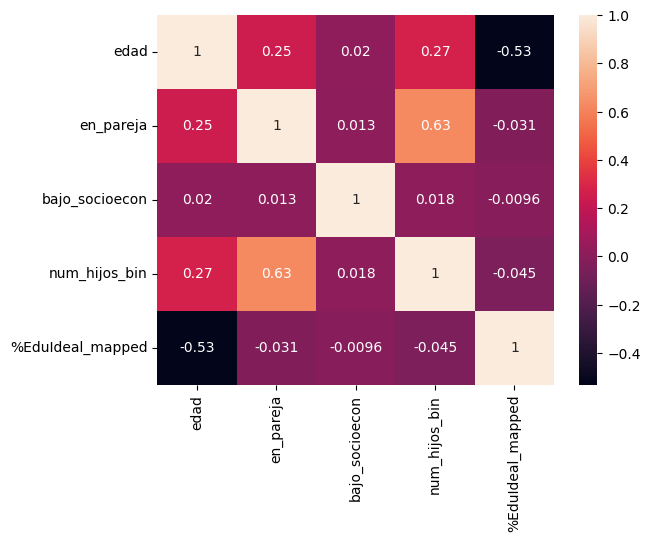

In [398]:
#Gráficamente correlación
sns.heatmap(corr_df2, annot=True)

Analisis de correlación, se observa las siguienes particularidades:
a) Se observan altos niveles de deserción, en base a la corr negativa de edad y %EduIdeal-

##LUEGO DE OBTENER EL DATASET MODELADO, RESPONDEMOS ALGUNOS PUNTOS

In [399]:
df.describe()

,edad,en_pareja,bajo_socioecon,num_hijos_bin,%EduIdeal_mapped
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,16.962064,0.161707,0.250049,0.132216,2.327769
std,1.413214,0.368194,0.433056,0.338737,1.065599
min,15.000000,0.000000,0.000000,0.000000,1.000000
25%,16.000000,0.000000,0.000000,0.000000,1.000000
50%,17.000000,0.000000,0.000000,0.000000,2.000000
75%,18.000000,0.000000,1.000000,0.000000,3.000000
max,19.000000,1.000000,1.000000,1.000000,4.000000


#¿Cuantas personas tienen hijos, y como se agrupa por categoría de anios educativos?

In [400]:
# Contar la cantidad de casos con y sin hijos
casos_con_hijos = df[df['num_hijos_bin'] == 1].shape[0]
casos_sin_hijos = df[df['num_hijos_bin'] == 0].shape[0]
total_casos = df.shape[0]

# Calcular los porcentajes
porcentaje_con_hijos = (casos_con_hijos / total_casos) * 100
porcentaje_sin_hijos = (casos_sin_hijos / total_casos) * 100

# Mostrar los resultados en cantidad y porcentaje
print("Cantidad de casos con hijos:", casos_con_hijos)
print("Porcentaje de casos con hijos: {:.2f}%".format(porcentaje_con_hijos))
print("\nCantidad de casos sin hijos:", casos_sin_hijos)
print("Porcentaje de casos sin hijos: {:.2f}%".format(porcentaje_sin_hijos))

Cantidad de casos con hijos: 2004
Porcentaje de casos con hijos: 13.22%

Cantidad de casos sin hijos: 13153
Porcentaje de casos sin hijos: 86.78%


In [402]:
#Queremoes entender la relación entre los años de educación y si tienen hijos
tamaño_grupo = df.groupby(['num_hijos_bin', '%EduIdeal_mapped']).size()

#Creamos la columna de cantidad
total_hijos = df.groupby('num_hijos_bin').size()

#Creamos con el calculo de  %
Porcentaje = tamaño_grupo.div(total_hijos, level='num_hijos_bin') * 100

result_df = pd.DataFrame({
    'Count': tamaño_grupo,
    'Percentage': Porcentaje
})

result_df

Count  Percentage
num_hijos_bin %EduIdeal_mapped                   
0             1                  3421   26.009275
              2                  4479   34.053068
              3                  2525   19.197141
              4                  2728   20.740515
1             1                   492   24.550898
              2                   906   45.209581
              3                   312   15.568862
              4                   294   14.670659

Las personas que tienen hijos, está más preparadas que las que no los tienen, ya que un 15% tiene ciclo básico, mientras que las que no tienen, pasa lo contrario.

In [412]:
#Otra forma de visualizarlo
df.groupby(['num_hijos_bin', '%EduIdeal_mapped']).size().unstack()#pivotea los anios_edu como encabezado de la tabla

%EduIdeal_mapped,1,2,3,4
num_hijos_bin,,,,
0,3421,4479,2525,2728
1,492,906,312,294


Medidas de resumen para las variables:

In [407]:
edad_agg = df.groupby('edad').agg({'edad': 'count',
                         '%EduIdeal_mapped': ['mean']})
edad_agg.head()

,edad,%EduIdeal_mapped
,count,mean
edad,,
15,3135,3.581818
16,3119,2.142674
17,2998,2.259506
18,2996,1.841121
19,2909,1.746305


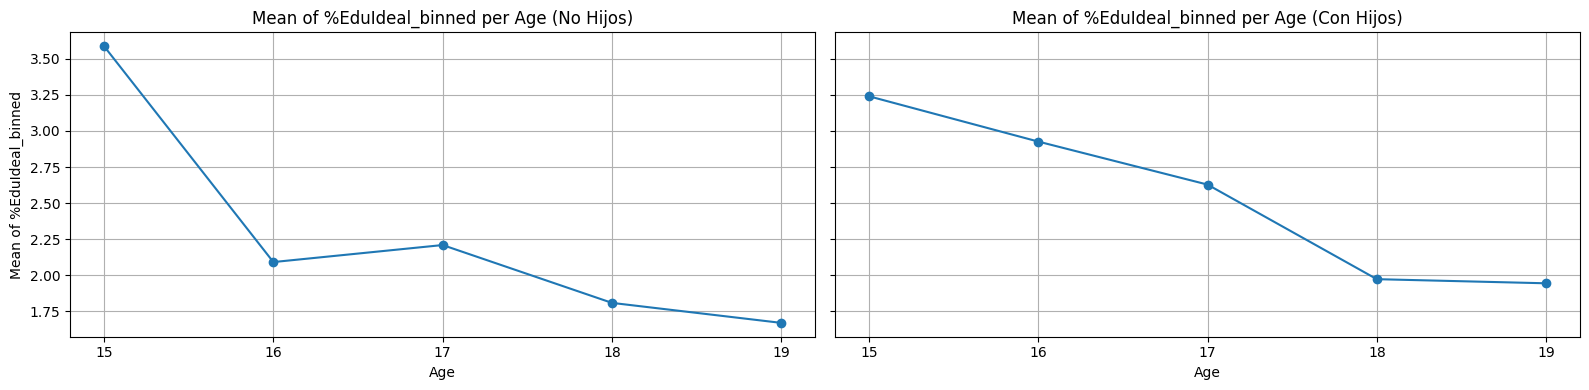

In [413]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4), sharey=True)

# Plot for num_hijos_bin == 0 (No hijos)
df[df['num_hijos_bin'] == 0].groupby('edad')['%EduIdeal_mapped'].mean().plot(kind='line', marker='o', ax=axes[0])
axes[0].set_title('Mean of %EduIdeal_binned per Age (No Hijos)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Mean of %EduIdeal_binned')
axes[0].set_xticks(df['edad'].unique())
axes[0].grid(True)

# Plot for num_hijos_bin == 1 (Con hijos)
df[df['num_hijos_bin'] == 1].groupby('edad')['%EduIdeal_mapped'].mean().plot(kind='line', marker='o', ax=axes[1])
axes[1].set_title('Mean of %EduIdeal_binned per Age (Con Hijos)')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Mean of %EduIdeal_binned')
axes[1].set_xticks(df['edad'].unique())
axes[1].grid(True)

plt.tight_layout()
plt.show()

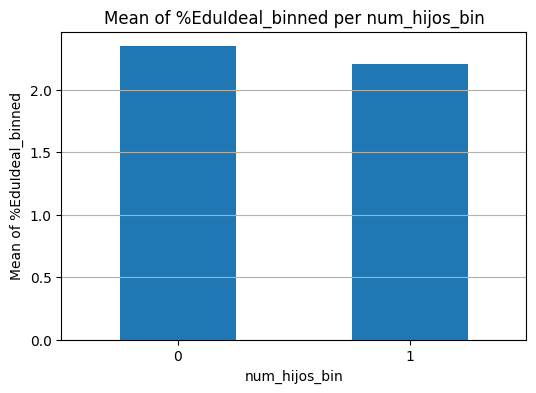

In [410]:
num_hijos_bin_agg = df.groupby('num_hijos_bin').agg({'num_hijos_bin': 'count',
                                         '%EduIdeal_mapped': ['mean']})
num_hijos_bin_agg.head()
plt.figure(figsize=(6, 4))
num_hijos_bin_agg['%EduIdeal_mapped']['mean'].plot(kind='bar')
plt.title('Mean of %EduIdeal_binned per num_hijos_bin')
plt.xlabel('num_hijos_bin')
plt.ylabel('Mean of %EduIdeal_binned')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

#Aca va el anlaisis (barras verdes) pasarlo a codigo para sacar conclusión